# Задача классификации уровня глобальных продаж видеоигр

## Описание датасета

Видеоигры — один из самых популярных видов развлечений. Люди играют на разных платформах
(консоли, ПК и т.д.), выбирают любимые жанры и следят за крупными релизами. Одни игры
становятся хитами и продаются огромными тиражами, другие почти незаметны.

В работе используется датасет vgsales с информацией о продажах видеоигр по регионам.
Для каждой игры указаны её основные характеристики и объёмы продаж.

Цель — по признакам игры предсказать, к какому уровню глобальных продаж она относится.
Это задача многоклассовой классификации.

Набор данных содержит следующие поля:

- Rank: Позиция игры в общем рейтинге продаж.
- Name: Название игры.
- Platform: Платформа, на которой вышла игра (например, PS4, X360, Wii и т.д.).
- Year: Год выхода игры.
- Genre: Жанр игры (Action, Sports, Racing и т.п.).
- Publisher: Издатель игры.
- NA_Sales: Продажи в Северной Америке (миллионы копий).
- EU_Sales: Продажи в Европе (миллионы копий).
- JP_Sales: Продажи в Японии (миллионы копий).
- Other_Sales: Продажи в остальных регионах (миллионы копий).
- Global_Sales: Суммарные глобальные продажи (миллионы копий).


## Загрузка данных и первичный осмотр

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11


try:
    df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
except FileNotFoundError:
    df = pd.read_csv("vgsales.csv")  # локальный запуск

print("Размер исходного датафрейма (строки × столбцы):", df.shape)
print("\nПервые строки набора данных:")
display(df.head())

print("\nИнформация о столбцах и типах данных:")
df.info()

Размер исходного датафрейма (строки × столбцы): (16598, 11)

Первые строки набора данных:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



Информация о столбцах и типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Разведочный анализ данных

Числовые признаки: ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Краткая статистика по числовым признакам:


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000



Число пропусков по каждому столбцу:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


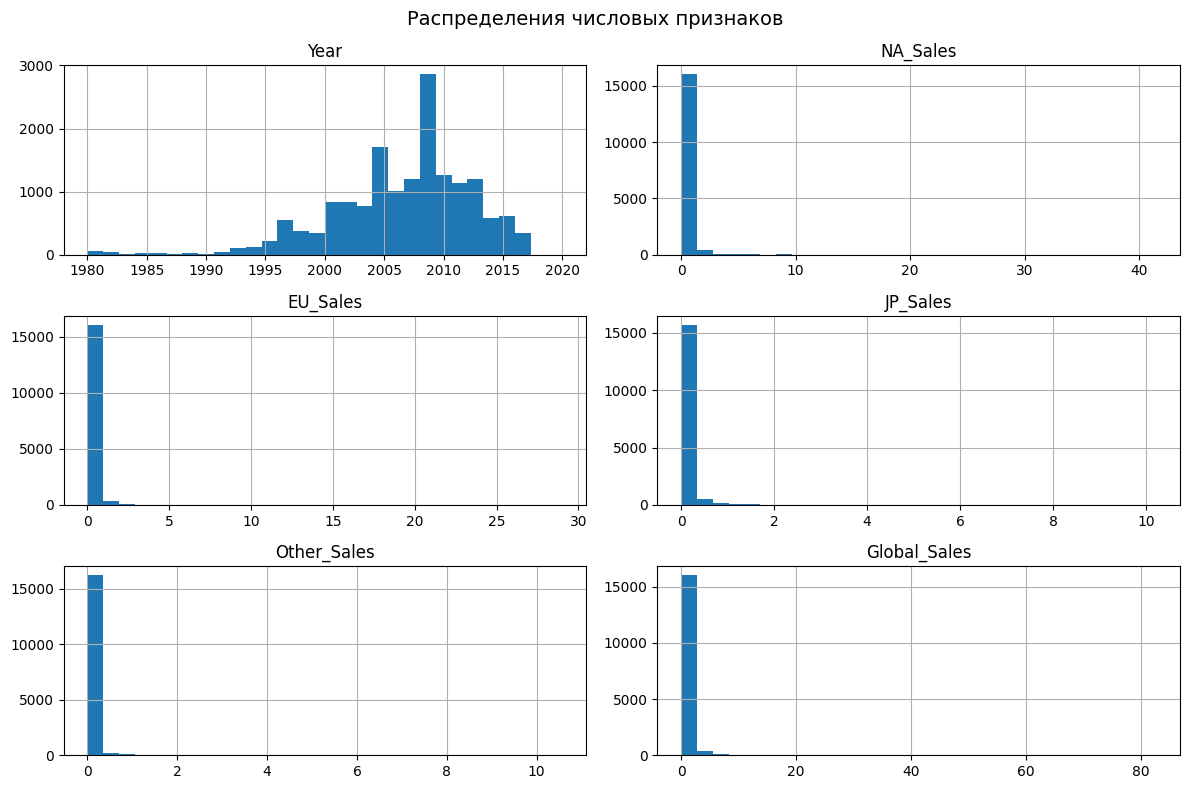

In [2]:

numeric_cols = ["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
print("Числовые признаки:", numeric_cols)

print("\nКраткая статистика по числовым признакам:")
display(df[numeric_cols].describe())

print("\nЧисло пропусков по каждому столбцу:")
print(df.isna().sum())


df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Распределения числовых признаков", fontsize=14)
plt.tight_layout()
plt.show()

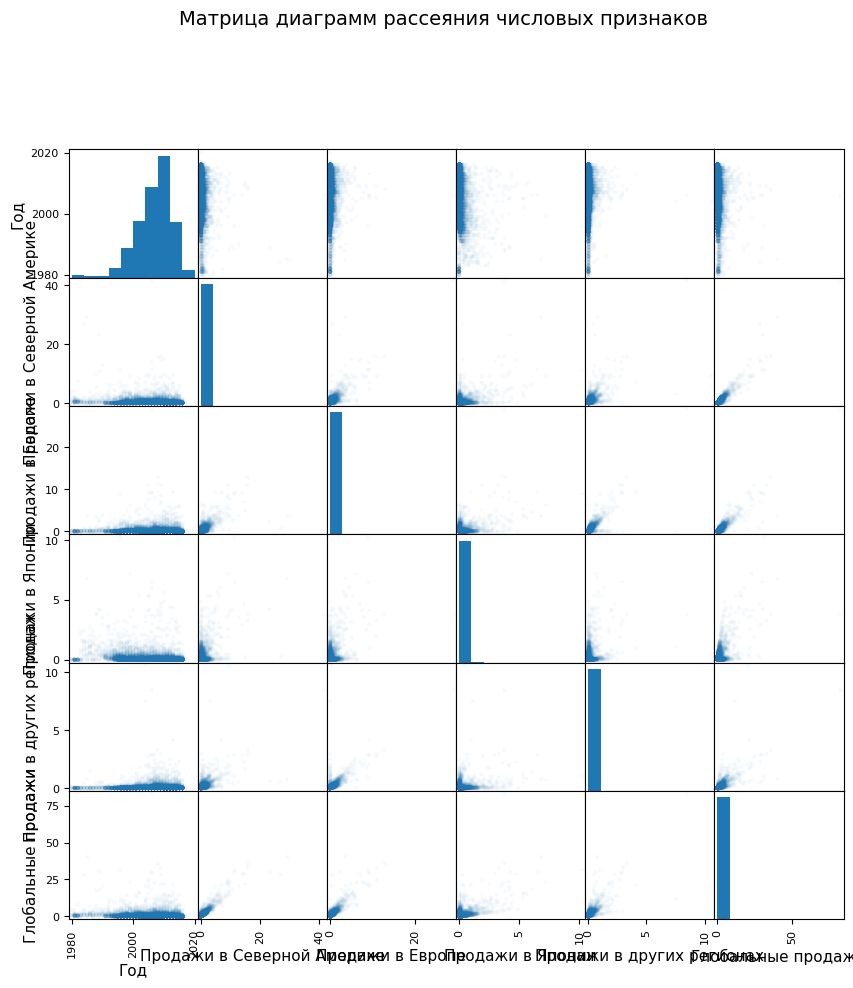

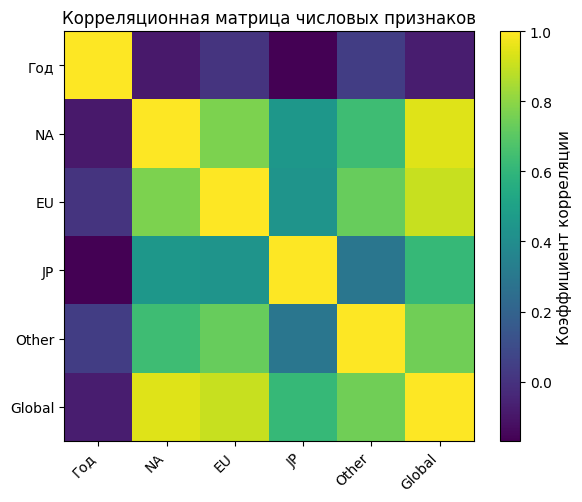

Матрица корреляций:
                  Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year          1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales      0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales   0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


In [3]:

from pandas.plotting import scatter_matrix

df_plot = df[numeric_cols].dropna().copy()
df_plot.columns = [
    "Год",
    "Продажи в Северной Америке",
    "Продажи в Европе",
    "Продажи в Японии",
    "Продажи в других регионах",
    "Глобальные продажи",
]

scatter_matrix(df_plot, alpha=0.03, figsize=(10, 10))
plt.suptitle("Матрица диаграмм рассеяния числовых признаков", y=1.02, fontsize=14)
plt.show()


corr = df[numeric_cols].corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(corr.columns)), ["Год", "NA", "EU", "JP", "Other", "Global"], rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), ["Год", "NA", "EU", "JP", "Other", "Global"])
plt.colorbar(label="Коэффициент корреляции")
plt.title("Корреляционная матрица числовых признаков")
plt.tight_layout()
plt.show()

print("Матрица корреляций:")
print(corr)

По гистограммам видно, что большинство игр имеют небольшие продажи, а очень большие значения встречаются редко. Пропуски в основном связаны с годом выхода и издателем, остальные признаки почти не содержат пропусков.

## Обработка пропусков и создание целевой переменной

Границы для уровней продаж (миллионы копий):
  Низкий уровень: Global_Sales < 0.090
  Средний уровень: [0.090; 0.330)
  Высокий уровень: ≥ 0.330

Распределение классов (количество объектов):
derived_target
1    5563
2    5490
0    5238
Name: count, dtype: int64

Распределение классов (доля от выборки):
derived_target
1    0.341477
2    0.336996
0    0.321527
Name: proportion, dtype: float64


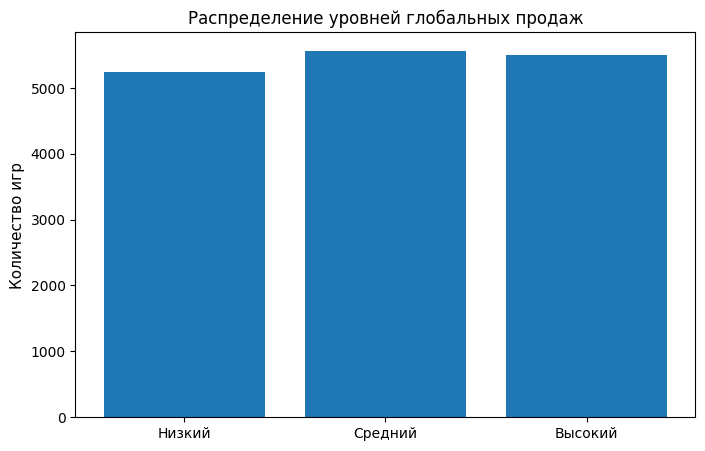

In [4]:

df = df.dropna(subset=["Year", "Publisher"]).reset_index(drop=True)


q1, q2 = df["Global_Sales"].quantile([1/3, 2/3])

def make_target(x):
    if x < q1:
        return 0  # низкий уровень продаж
    elif x < q2:
        return 1  # средний уровень продаж
    else:
        return 2  # высокий уровень продаж

df["derived_target"] = df["Global_Sales"].apply(make_target)

print("Границы для уровней продаж (миллионы копий):")
print(f"  Низкий уровень: Global_Sales < {q1:.3f}")
print(f"  Средний уровень: [{q1:.3f}; {q2:.3f})")
print(f"  Высокий уровень: ≥ {q2:.3f}\n")

print("Распределение классов (количество объектов):")
print(df['derived_target'].value_counts())

print("\nРаспределение классов (доля от выборки):")
print(df['derived_target'].value_counts(normalize=True))


class_counts = df["derived_target"].value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values)
plt.xticks([0, 1, 2], ["Низкий", "Средний", "Высокий"])
plt.ylabel("Количество игр")
plt.title("Распределение уровней глобальных продаж")
plt.show()

Целевая переменная `derived_target` делит игры на три группы:
с низкими, средними и высокими глобальными продажами. Границы подбираю так,
чтобы в каждом классе было примерно одинаковое число объектов.

## Подготовка признаков для моделирования

In [5]:

df_model = df.drop(columns=["Rank", "Name"])
df_model = df_model.drop(columns=["Global_Sales"])

y = df_model["derived_target"]
X = df_model.drop(columns=["derived_target"])

categorical_cols = ["Platform", "Genre", "Publisher"]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

print("Категориальные признаки:", categorical_cols)
print("Числовые признаки:", numeric_cols)

from sklearn.preprocessing import StandardScaler


X_cat = pd.get_dummies(X[categorical_cols], drop_first=True)


scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[numeric_cols])


X_prepared = np.hstack([X_num_scaled, X_cat.values])
feature_names = list(numeric_cols) + list(X_cat.columns)

print("\nРазмер матрицы признаков после подготовки:", X_prepared.shape)

Категориальные признаки: ['Platform', 'Genre', 'Publisher']
Числовые признаки: ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

Размер матрицы признаков после подготовки: (16291, 621)

Размер матрицы признаков после подготовки: (16291, 621)


## Разделение на обучение и тест

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42, stratify=y
)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки   :", X_test.shape[0])

Размер обучающей выборки: 13032
Размер тестовой выборки   : 3259


Данные делю на обучающую и тестовую части, чтобы обучение и проверка качества
проходили на разных примерах.

k =  3 | ошибка на обучении = 0.1443, ошибка на тесте = 0.2869
k =  5 | ошибка на обучении = 0.1848, ошибка на тесте = 0.2838
k =  5 | ошибка на обучении = 0.1848, ошибка на тесте = 0.2838
k =  7 | ошибка на обучении = 0.2029, ошибка на тесте = 0.2820
k =  7 | ошибка на обучении = 0.2029, ошибка на тесте = 0.2820
k =  9 | ошибка на обучении = 0.2139, ошибка на тесте = 0.2765
k =  9 | ошибка на обучении = 0.2139, ошибка на тесте = 0.2765
k = 11 | ошибка на обучении = 0.2163, ошибка на тесте = 0.2691
k = 11 | ошибка на обучении = 0.2163, ошибка на тесте = 0.2691
k = 13 | ошибка на обучении = 0.2194, ошибка на тесте = 0.2636
k = 13 | ошибка на обучении = 0.2194, ошибка на тесте = 0.2636


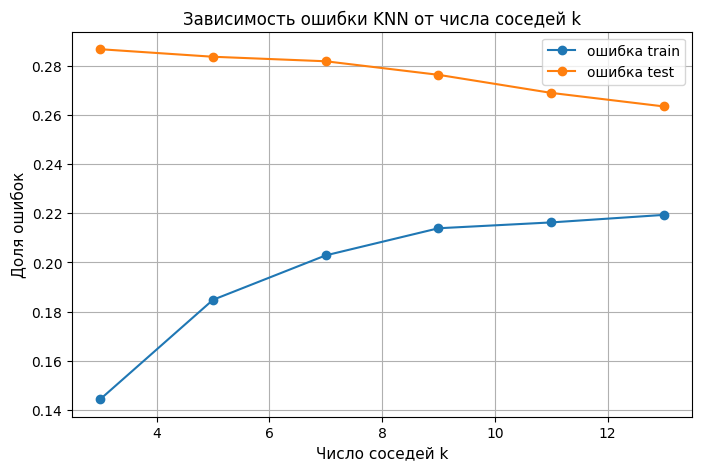


Оптимальное число соседей по ошибке на тесте: 13
Оптимальное число соседей по ошибке на тесте: 13


In [7]:
from sklearn.neighbors import KNeighborsClassifier

train_errors = []
test_errors = []
neighbors_grid = range(3, 14, 2)  # небольшая сетка по k

for k in neighbors_grid:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)

    err_train = np.mean(knn.predict(X_train) != y_train)
    err_test = np.mean(knn.predict(X_test) != y_test)

    train_errors.append(err_train)
    test_errors.append(err_test)

    print(f"k = {k:2d} | ошибка на обучении = {err_train:.4f}, ошибка на тесте = {err_test:.4f}")

plt.figure()
plt.plot(list(neighbors_grid), train_errors, marker="o", label="ошибка train")
plt.plot(list(neighbors_grid), test_errors, marker="o", label="ошибка test")
plt.xlabel("Число соседей k")
plt.ylabel("Доля ошибок")
plt.title("Зависимость ошибки KNN от числа соседей k")
plt.legend()
plt.grid(True)
plt.show()

best_k = list(neighbors_grid)[int(np.argmin(test_errors))]
print("\nОптимальное число соседей по ошибке на тесте:", best_k)

best_knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
best_knn.fit(X_train, y_train)
print("Оптимальное число соседей по ошибке на тесте:", best_k)


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_knn = best_knn.predict(X_test)

print("KNN: качество на тестовой выборке")
print(classification_report(y_test, y_pred_knn))

print("Матрица ошибок KNN:")
print(confusion_matrix(y_test, y_pred_knn))

KNN: качество на тестовой выборке
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1048
           1       0.62      0.70      0.66      1113
           2       0.87      0.75      0.81      1098

    accuracy                           0.74      3259
   macro avg       0.75      0.74      0.74      3259
weighted avg       0.75      0.74      0.74      3259

Матрица ошибок KNN:
[[799 223  26]
 [246 774  93]
 [ 27 244 827]]


Для модели KNN перебираю несколько значений параметра `k` и смотрю, как меняется
ошибка на обучающей и тестовой выборках. При слишком маленьком `k` модель
переобучается, при очень большом `k` качество тоже падает. В работе использую
то значение, при котором ошибка на тестовой выборке минимальна; по отчёту видно,
как модель различает три уровня продаж.

## Сравнение с другими моделями

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "LR (LogisticRegression)": LogisticRegression(max_iter=1000, C=1.0),
    "RFC (RandomForestClassifier)": RandomForestClassifier(
        n_estimators=100, max_depth=None, random_state=42, n_jobs=-1
    ),
    "GBC (GradientBoostingClassifier)": GradientBoostingClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    print(f"\n{name}")
    print(f"Точность на train: {acc_train:.4f}")
    print(f"Точность на test : {acc_test:.4f}")


LR (LogisticRegression)
Точность на train: 0.9715
Точность на test : 0.9620

RFC (RandomForestClassifier)
Точность на train: 0.9997
Точность на test : 0.9669

RFC (RandomForestClassifier)
Точность на train: 0.9997
Точность на test : 0.9669

GBC (GradientBoostingClassifier)
Точность на train: 0.9866
Точность на test : 0.9822

GBC (GradientBoostingClassifier)
Точность на train: 0.9866
Точность на test : 0.9822


Кроме KNN использую также модели LogisticRegression, RandomForestClassifier и GradientBoostingClassifier.

## Метод RFC (Random forest classifier)

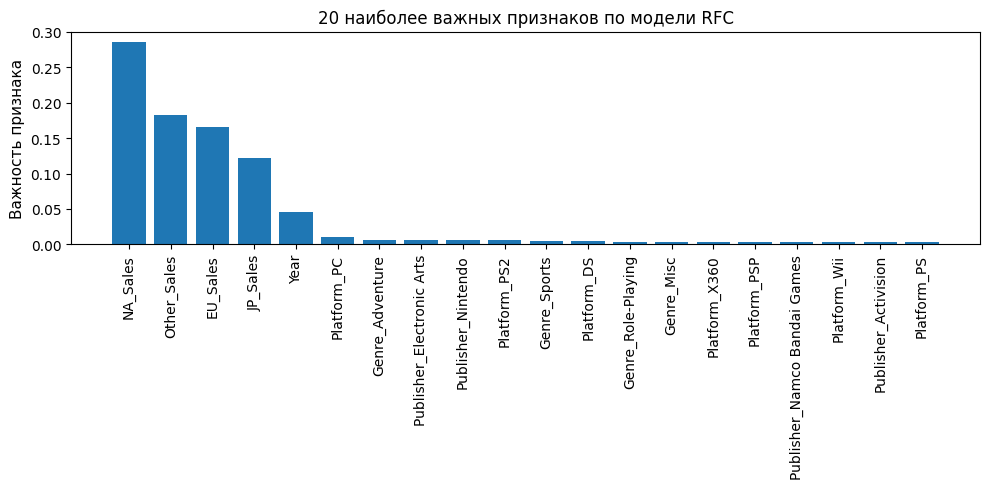

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100, max_depth=None, random_state=42, n_jobs=-1
)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
idx = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(10, 5))
plt.title("20 наиболее важных признаков по модели RFC")
plt.bar(range(len(idx)), importances[idx], align="center")
plt.xticks(range(len(idx)), [feature_names[i] for i in idx], rotation=90)
plt.ylabel("Важность признака")
plt.tight_layout()
plt.show()

График важности признаков показывает, какие факторы сильнее всего влияют на предсказания случайного леса. Чаще всего наверху оказываются региональные продажи и некоторые категории платформ и жанров.

## Вывод

Проведён анализ данных о продажах видеоигр и построены несколько моделей классификации уровня глобальных продаж. После подготовки признаков и подбора параметров модели показывают невысокую ошибку на тестовой выборке. Среди них наиболее устойчиво работают ансамблевые алгоритмы (RandomForestClassifier и GradientBoostingClassifier), у которых качество на тесте выше, чем у LogisticRegression и базового KNN. Коррелирующие и лишние признаки частично убраны на этапе подготовки данных, поэтому они не мешают моделям делать достаточно точные предсказания.